<a href="https://colab.research.google.com/github/yonathanm772/MLA_JMA/blob/main/MLA5_JMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Jonathan Moreira Alsina**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [ ]:
 # Include imports for Voting, Bagging, Random Forest and AdaBoost classifier
 from sklearn.ensemble import VotingClassifier
 from sklearn.ensemble import BaggingClassifier
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.ensemble import AdaBoostClassifier
 from sklearn.metrics import classification_report
 from sklearn.metrics import ConfusionMatrixDisplay

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
# Loads the landsat_train .csv into a data frame named landsat_train.
landsat_train = pd.read_csv('/content/drive/MyDrive/CS 430/MLA5_JMA/landsat_train.csv')

# Loads the landsat_test .csv into a data frame named landsat_train.
landsat_test = pd.read_csv('/content/drive/MyDrive/CS 430/MLA5_JMA/landsat_test.csv')

In [ ]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [ ]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


### Statistics and Visual Exploration

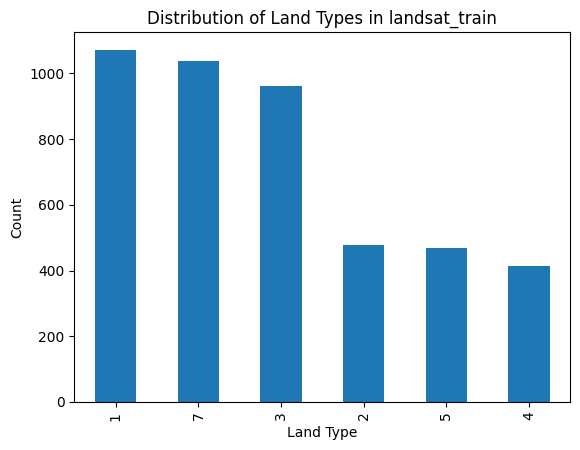

In [ ]:
# Create bar plots to display the number of land types for landsat_train
landsat_train['land_type'].value_counts().plot(kind='bar')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.title('Distribution of Land Types in landsat_train')
plt.show()

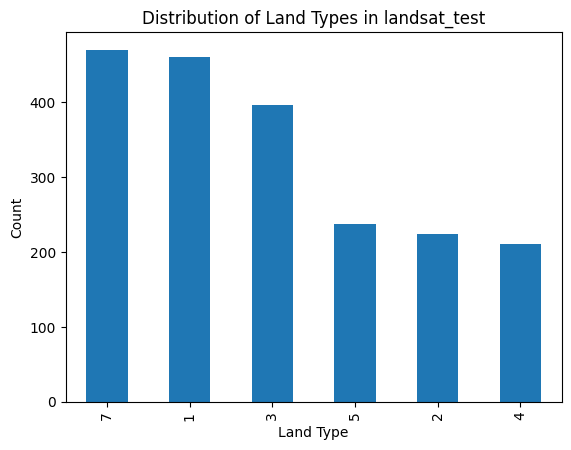

In [ ]:
# Create bar plots to display the number of land types for landsat_test
landsat_test['land_type'].value_counts().plot(kind='bar')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.title('Distribution of Land Types in landsat_test')
plt.show()

### Splitting Data into Train/Test

In [ ]:
# Create a data frame called X_train with all columns from landsat_train except for land_type.
X_train = landsat_train.drop('land_type', axis=1)


In [ ]:
# Create a data frame called X_test with all columns from landsat_test except for land_type.
X_test = landsat_test.drop('land_type', axis=1)

In [ ]:
# Create a data frame called y_train with the land_type column from landsat_train.
y_train = landsat_train['land_type']

In [ ]:
# Create a data frame called y_test with the land_type column from landsat_test.
y_test = landsat_test['land_type']

### Building the Pipeline

In [ ]:
# Separates the numerical variables of X_train
numerical_data_X = X_train.select_dtypes(include=['number']).columns
categorical_data_X = X_train.select_dtypes(include=['object']).columns

In [ ]:
# Create a ColumnTransformer that will MinMaxScaler the numerical variables
column_transformer  = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_data_X)
    ])

In [ ]:
# Creates a pipeline that will transform the data and then run the RandomForestClassifier algorithm
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier())
])


### Executing the Model

In [ ]:
# Runs the pipeline to fit the RandomForestClassification  model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating Model

In [ ]:
# Runs the pipeline to predict y values from the test data set and save them in a variable called y_pred
y_pred = pipeline.predict(X_test)

In [ ]:
# Use the classification_function to display the precision, recall, and F1 score for each class.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.97      0.98       224
           3       0.88      0.95      0.92       397
           4       0.78      0.64      0.70       211
           5       0.91      0.88      0.89       237
           7       0.88      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



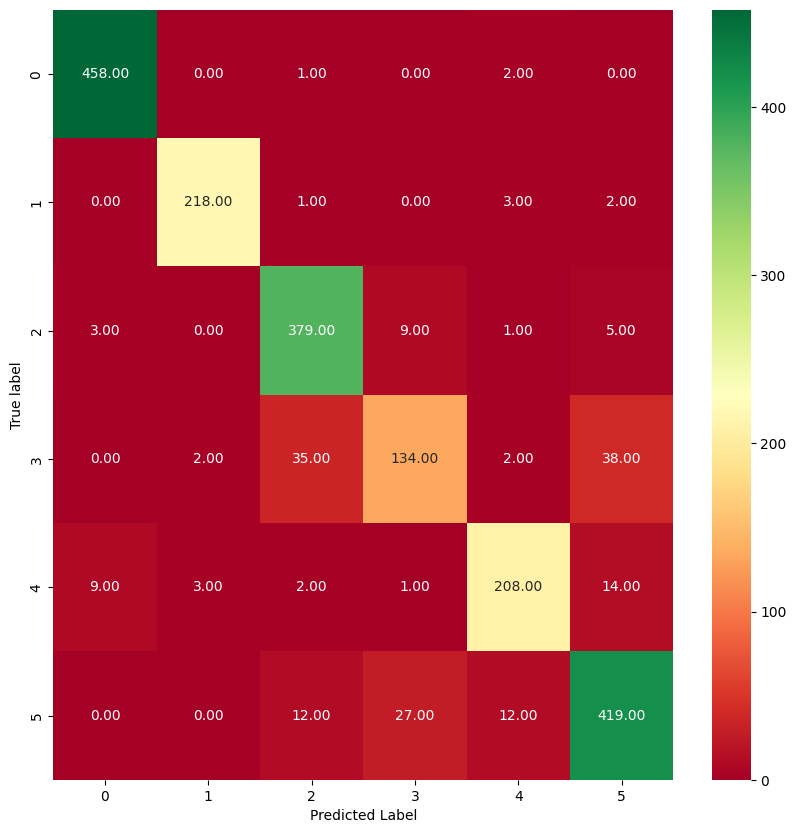

In [ ]:
# Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.
plot_cm(y_test, y_pred)

### Conclusion
Overall, The model seems suitable for land type prediction in many cases, especially for the more well-represented land types (e.g., Class 1 and Class 2). The overall accuracy and F1-scores are strong, indicating that it is generally a reliable model.
The model's performance drops significantly for Class 4, which is likely due to a variety of factors such as class imbalance, difficulty distinguishing features for this class, or insufficient data for that class

## Problem 2

### Reading the Data

In [ ]:
# Loads the landsat_train .csv into a data frame named landsat_train.
landsat_train = pd.read_csv('/content/drive/MyDrive/CS 430/MLA5_JMA/landsat_train.csv')

# Loads the landsat_test .csv into a data frame named landsat_train.
landsat_test = pd.read_csv('/content/drive/MyDrive/CS 430/MLA5_JMA/landsat_test.csv')

In [ ]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


### Splitting Data into Train/Test

In [ ]:
# Create a data frame called X_train with all columns from landsat_train except for land_type.
X_train = landsat_train.drop('land_type', axis=1)

# Create a data frame called X_test with all columns from landsat_test except for land_type.
X_test = landsat_test.drop('land_type', axis=1)

# Create a data frame called y_train with the land_type column from landsat_train.
y_train = landsat_train['land_type']

# Create a data frame called y_test with the land_type column from landsat_test.
y_test = landsat_test['land_type']

In [ ]:
# Splits the data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building the Pipeline

In [ ]:
# Separates the numerical variables of X_train
numerical_data_X = X_train.select_dtypes(include=['number']).columns
categorical_data_X = X_train.select_dtypes(include=['object']).columns

# Create a ColumnTransformer that will MinMaxScaler the numerical variables
column_transformer  = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_data_X)
    ])


In [ ]:
# import Voting
from sklearn.ensemble import VotingClassifier

In [ ]:
# Creates a pipeline that will transform the data and then run the VotingClassifier algorithm
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', VotingClassifier(estimators=[
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('ada', AdaBoostClassifier())
    ]))
])

### Executing the Model

In [ ]:
# Runs the pipeline to fit the DecisionTreeRegression
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                                              ('rf', RandomForestClassifier()),
                                              ('ada', AdaBoostClassifier())]))])

### Evaluating Model

In [ ]:
# Runs the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = pipeline.predict(X_test)

In [ ]:
# Use the classification_function to display the precision, recall, and F1 score for each class.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.98      0.97       461
           2       0.95      0.99      0.97       224
           3       0.88      0.90      0.89       397
           4       0.64      0.68      0.66       211
           5       0.92      0.82      0.87       237
           7       0.88      0.85      0.86       470

    accuracy                           0.88      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.88      0.88      0.88      2000



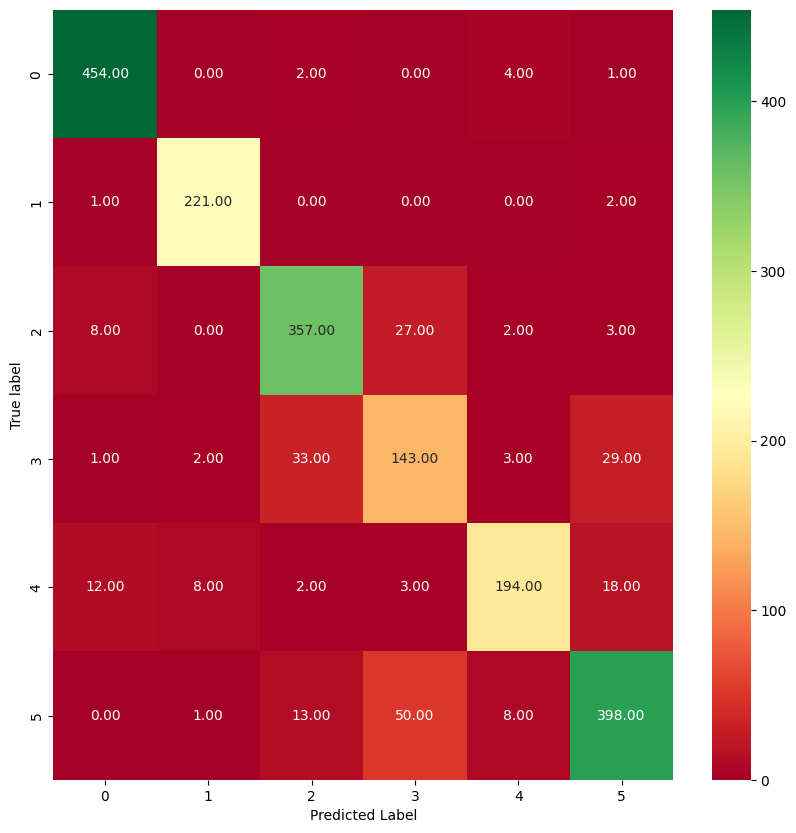

In [ ]:
# Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.
plot_cm(y_test, y_pred)

### Conclusion
Precision for most classes is still quite high, especially for Class 1, Class 2, and Class 5, which all have precision above 0.90. This indicates that the model is relatively accurate when it predicts these classes. Overall, the model achieves 88% accuracy, which is lower than the first model's 91% accuracy but still respectable.
The weighted average precision, recall, and F1-score of 0.88 suggest that the model performs reasonably well across the different classes too.

### Acquire Data

In [ ]:
# Loads the landsat_train .csv into a data frame named landsat_train.
banknote_authentication  = pd.read_csv('/content/drive/MyDrive/CS 430/MLA5_JMA/banknote_authentication (1).csv')

In [ ]:
banknote_authentication.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Splitting Data into Train/Test

In [ ]:
# Creates a dataframe called X that includes all columns except date and forgery
X = banknote_authentication.drop('forgery', axis=1)

In [ ]:
# Creates a dataframe called y that includes only the forgery column
y = banknote_authentication['forgery']

In [ ]:
# Splits the data into Train/Test sets using 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [ ]:
# Separates the numerical variables
numerical_data = X.select_dtypes(include=['number']).columns
categorical_data = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer that will MinMaxScaler the numerical variables
column_transformer  = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_data)
    ])


In [ ]:
# Create a pipeline that will transform the data and then run the RandomForestClassifier algorithm.
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier())
])

### Executing the Model

In [ ]:
# Run the pipeline to fit the RandomForestClassification model.
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating the Model

In [ ]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y_pred = pipeline.predict(X_test)

In [ ]:
# Use the classification_function to display the precision, recall, and F1 score for each class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



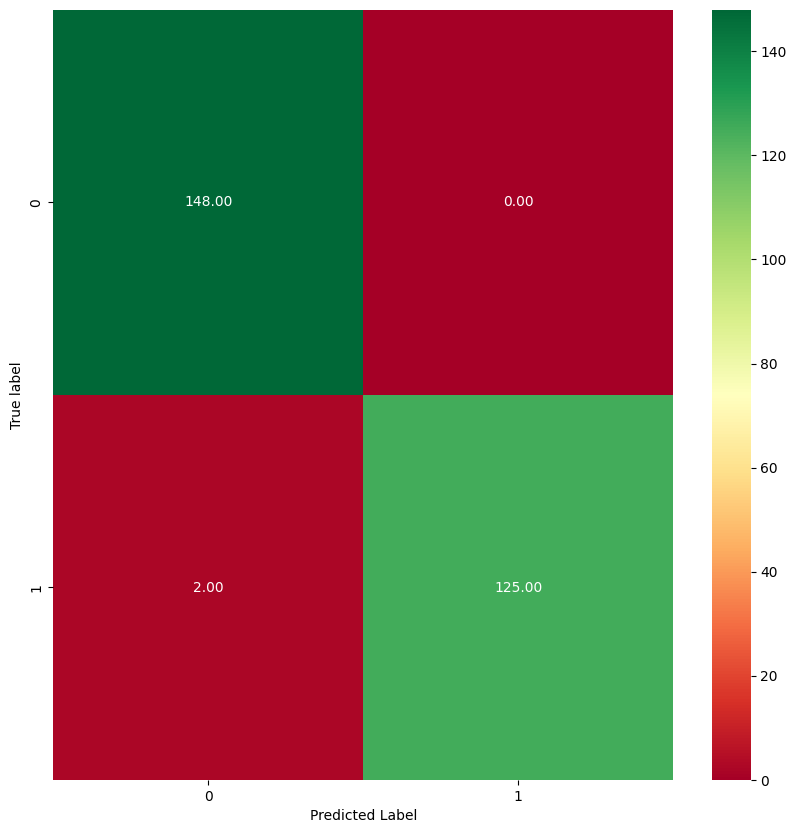

In [ ]:
# Use the ConfusionMatrixDisplay function (and associated code) to display a heatmap of the confusion matrix.
plot_cm(y_test, y_pred)

### Conclusion
Both classes have excellent precision and recall, with Class 0 achieving perfect recall (1.00) and very high precision (0.99), and Class 1 being almost perfect with a recall of 0.98 and precision of 1.00.This model is highly suitable for predicting Class 0 and Class 1, with nearly perfect performance on both classes. However, because it is evaluated on a small dataset with just two classes, its high performance is expected and does not necessarily reflect its ability to handle more complex, multi-class problems with larger datasets.